In [97]:
import pandas as pd
import dateutil
import time
import matplotlib.pyplot as plt
import csv
import networkx as nx

In [98]:
#Esta aplicacion esta realizada para simular la creacion del grafo a recorrer como camino guia para LYKA
#Esta creacion de grafo se debe realizar con el modelo 3D para poder definir la ruta con exactitud. (latitud,longitud,altitud)
#Se uso el area de la estacion internacionl espacial (88 mts x 109 mts)

In [99]:
#Cada grid tendra un tamaño de 3 metro (la medida esta en km)
gridSize=0.003
#Bounding Box
BOUNDING_BOX=[(-2.14314, -79.96802), (-2.14236, -79.96703)]   
#Espacion de la nave que no se revisaria.
NOT_BOUNDING_BOX1= [(-2.14233, -79.968),(-2.14259, -79.96755)]
NOT_BOUNDING_BOX2=[(-2.14283, -79.96802),(-2.14314, -79.96755)]

In [100]:
#BOUNDING_BOX=[(-2.14233, -79.968), (-2.14313, -79.96702)]
#El tamañodeGrid es la distancia en kilometros que va a tener ese grid (kilometros)
def tablaGrid(TamanodeGrid):
    BOUNDING_BOX=[(-2.14314, -79.96802), (-2.14236, -79.96703)]  
    #inicio=tuple(long,latitud)
    inicio=BOUNDING_BOX[0]
    fin=BOUNDING_BOX[1]
    diccGrid={}
    grid=None
    contadorG=1
    bandera=True
    #Hay 8 columnas
    numeroColumnas=int((abs(BOUNDING_BOX[1][0]-BOUNDING_BOX[0][0])*100//TamanodeGrid))+1
    numeroFilas=int((abs(BOUNDING_BOX[1][1]-BOUNDING_BOX[0][1])*100//TamanodeGrid))+1
    for j in range(1,numeroColumnas+1):
        columna=BOUNDING_BOX[0][0]+(j*TamanodeGrid)/100
        inicio=(BOUNDING_BOX[0][0]+((j-1)*TamanodeGrid)/100,BOUNDING_BOX[0][1])
        #hay 11 filas
        for i in range(1,numeroFilas+1):
            fila=BOUNDING_BOX[0][1]+(i*TamanodeGrid)/100
            fin=(columna,fila)
            tupla =(float("{0:.5f}".format((inicio[0]+fin[0])/2)),float("{0:.5f}".format((inicio[1]+fin[1])/2)))
            if(not pertenece1(tupla[0],tupla[1]) and not pertenece2(tupla[0],tupla[1])):
                diccGrid[contadorG]=(float("{0:.5f}".format((inicio[0]+fin[0])/2)),float("{0:.5f}".format((inicio[1]+fin[1])/2)))
            inicio=(inicio[0],BOUNDING_BOX[0][1]+((i-1)*TamanodeGrid)/100)
            contadorG+=1
    #diccGrid["filas"]=numeroFilas
    #diccGrid["columnas"]=numeroColumnas
    return diccGrid

def cualGrid(long,lat,TamanodeGrid):
    BOUNDING_BOX=[(-74.047285,40.680396), (-73.907,40.882214)]
    grid=None
    contadorG=1
    bandera=True
    #Hay 8 columnas
    numeroColumnas=int((abs(BOUNDING_BOX[1][0]-BOUNDING_BOX[0][0])*100//TamanodeGrid))+1
    numeroFilas=int((abs(BOUNDING_BOX[1][1]-BOUNDING_BOX[0][1])*100//TamanodeGrid))+1
    for j in range(1,numeroColumnas+1):
        columna=BOUNDING_BOX[0][0]+(j*TamanodeGrid)/100
        #hay 11 filas
        for i in range(1,numeroFilas+1):
            fila=BOUNDING_BOX[0][1]+(i*TamanodeGrid)/100
            if(long <= (columna) and lat <= fila):
                return contadorG
            else:
                contadorG+=1
                
                
def pertenece1(lat,long):
    return lat<=NOT_BOUNDING_BOX1[0][0] and lat>=NOT_BOUNDING_BOX1[1][0] and long>=NOT_BOUNDING_BOX1[0][1] and long<=NOT_BOUNDING_BOX1[1][1]

def pertenece2(lat,long):
    return lat<=NOT_BOUNDING_BOX2[0][0] and lat>=NOT_BOUNDING_BOX2[1][0] and long>=NOT_BOUNDING_BOX2[0][1] and long<=NOT_BOUNDING_BOX2[1][1]

In [101]:
grids=tablaGrid(gridSize)
grids

{17: (-2.14312, -79.96754),
 18: (-2.14312, -79.96751),
 19: (-2.14312, -79.96748),
 20: (-2.14312, -79.96745),
 21: (-2.14312, -79.96742),
 22: (-2.14312, -79.96739),
 23: (-2.14312, -79.96736),
 24: (-2.14312, -79.96733),
 25: (-2.14312, -79.9673),
 26: (-2.14312, -79.96727),
 27: (-2.14312, -79.96724),
 28: (-2.14312, -79.96721),
 29: (-2.14312, -79.96718),
 30: (-2.14312, -79.96715),
 31: (-2.14312, -79.96712),
 32: (-2.14312, -79.96709),
 33: (-2.14312, -79.96706),
 34: (-2.14312, -79.96703),
 51: (-2.14309, -79.96754),
 52: (-2.14309, -79.96751),
 53: (-2.14309, -79.96748),
 54: (-2.14309, -79.96745),
 55: (-2.14309, -79.96742),
 56: (-2.14309, -79.96739),
 57: (-2.14309, -79.96736),
 58: (-2.14309, -79.96733),
 59: (-2.14309, -79.9673),
 60: (-2.14309, -79.96727),
 61: (-2.14309, -79.96724),
 62: (-2.14309, -79.96721),
 63: (-2.14309, -79.96718),
 64: (-2.14309, -79.96715),
 65: (-2.14309, -79.96712),
 66: (-2.14309, -79.96709),
 67: (-2.14309, -79.96706),
 68: (-2.14309, -79.96

In [102]:
len(tablaGrid(gridSize))

604

In [103]:
G= nx.DiGraph()
for i in range(0,len(grids)):
    G.add_node(i)

In [104]:
#lo que se grabara en el archivo gridnodes
listaX=[]
listaX.append(["node","latitude","longitude"])
for i,j in grids.items():
    listaX.append([i-1,j[0],j[1]])

In [105]:
with open("gridNodesISS.csv","w",newline="") as fp:
    a=csv.writer(fp,delimiter=",")
    a.writerows(listaX)

In [106]:
listID= list(grids.keys())
listLatitud = []
listLongitud = []
for key in listID:
    listLatitud.append(grids[key][0])
    listLongitud.append(grids[key][1])
d = {'id': listID, 'latitud': listLatitud, 'longitud':listLongitud}
df = pd.DataFrame(data=d)
df    

,id,latitud,longitud
0,17,-2.14312,-79.96754
1,18,-2.14312,-79.96751
2,19,-2.14312,-79.96748
3,20,-2.14312,-79.96745
4,21,-2.14312,-79.96742
5,22,-2.14312,-79.96739
6,23,-2.14312,-79.96736
7,24,-2.14312,-79.96733
8,25,-2.14312,-79.96730
9,26,-2.14312,-79.96727


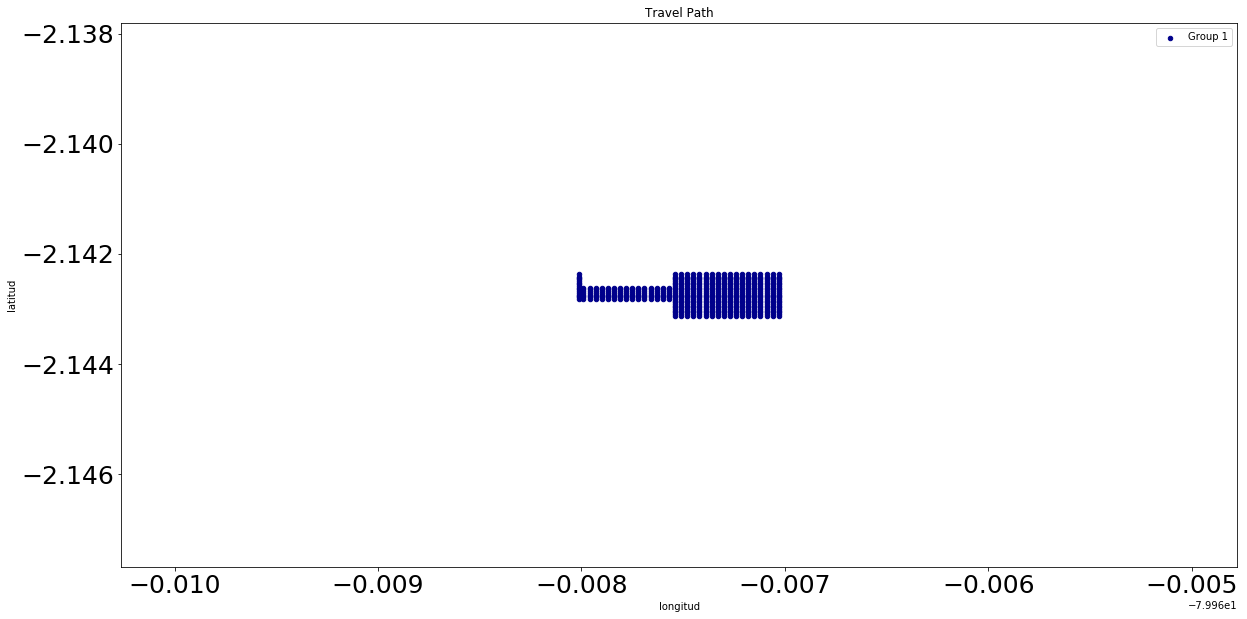

In [107]:
df.plot.scatter(x= 'longitud',y= 'latitud', color='DarkBlue', label='Group 1',  figsize=(20,10),
                   grid=False,title='Travel Path',fontsize=25 )
#plt.savefig('pickupPlaceBB.png', bbox_inches='tight')
plt.show()